
# **Preparação do ambiente com instalação de pacotes necessários ao projeto**

Tem que instalar estes pacotes para este projeto <br>
**gym box2d-py numpy tqdm pyvirtualdisplay**

Se estiver numa distro Linux, instale pelo pip mesmo <br>
*$ pip install gym[all] box2d-py numpy tqdm pyvirtualdisplay*

No Windows é ideal ter o Anaconda instalado e usá-lo para instalar estes pacotes <br>
*conda install gym[all] box2d-py numpy tqdm pyvirtualdisplay*

**Preâmbulo do projeto**

In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from pyvirtualdisplay import Display
from tqdm import tqdm

**Inicialização do projeto**

In [11]:
Display().start()
env = gym.make('CartPole-v0')
state = env.reset()

/home/wasf84/.local/lib/python3.10/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/wasf84/.local/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/wasf84/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


**Demonstração da inicialização do projeto**

In [12]:
print(f"""
Posição do carrinho:\t\t {state[0]}
Velocidade do carrinho:\t\t {state[1]}
Ângulo do mastro:\t\t {state[2]}
Velocidade angular do mastro:\t {state[3]}
""")


Posição do carrinho:		 -0.03517352044582367
Velocidade do carrinho:		 -0.005149587988853455
Ângulo do mastro:		 -0.010446863248944283
Velocidade angular do mastro:	 0.03097614273428917



/home/wasf84/.local/lib/python3.10/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


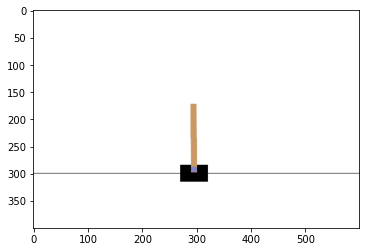

In [13]:
img = plt.imshow(env.render("rgb_array"))

In [16]:
# Classe Agente para criação das políticas que controlarão o carrinho

class Agente(object):
    def __init__(self):
        # Método de inicialização do objeto
        pass
    
    def __repr__(self):
        # Método para quando chamar 'print(agente)'
        pass
    
    def action(self, st):
        # Método que vai escolher qual a melhor ação para controlar o carrinho
        
        if st[2] < 0:
            return 0
        else:
            return 1

In [17]:
qtd_episodios = 1000
rewards = []
ag = Agente()
#----------------------------#
for _ in tqdm(range(qtd_episodios)):
    done = False
    state = env.reset()
    reward = []
    while not done:
        #action = env.action_space.sample()
        action = ag.action(state)
        state, r, done, info = env.step(action)
        reward.append(r)
    env.close()
    rewards.append(sum(reward))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 617.82it/s]


**Plotando o histograma**

Explicando o gráfico:
- o eixo y é a quantidade de episódios
- o eixo x mostra a quantidade de movimentos feita antes do episódio encerrar (por erro ou por atingir o limite - explicado na página do CartPole)

(array([ 58.,  43., 226., 274., 130., 153.,  74.,  36.,   3.,   3.]),
 array([24. , 28.8, 33.6, 38.4, 43.2, 48. , 52.8, 57.6, 62.4, 67.2, 72. ]),
 <BarContainer object of 10 artists>)

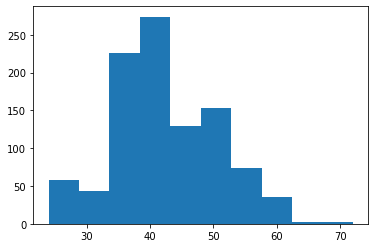

In [18]:
rewards = np.array(rewards)
plt.hist(rewards)